In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from itertools import product
import scipy.stats as ss

In [2]:
data0 = pd.read_excel("Book3.xlsx")

In [3]:
data0.head()

,CodMun,State,State code,Municipaly,Estimated pop 2021,track_pop,Region,mpeg03,Mayor Age,Mayor Ethnicity,mpeg06 - Education of the mayor,Education of mayor,Projects aimed at Rural Population
0,1100015,RO,11,Alta Floresta DOeste,22516,4 - 20001 to 50000,1 - North,Masculine,40.0,White,Specialization,NaN,Yes
1,1100023,RO,11,Ariquemes,111148,6 - 100001 to 500000,1 - North,Female,33.0,White,complete higher education,2.0,Yes
2,1100031,RO,11,Cabixi,5067,2 - 5001 to 10000,1 - North,Masculine,50.0,brown,complete higher education,2.0,Yes
3,1100049,RO,11,Cacoal,86416,5 - 50001 to 100000,1 - North,Masculine,35.0,brown,complete higher education,2.0,Yes
4,1100056,RO,11,Cerejeiras,16088,3 - 10001 to 20000,1 - North,Female,57.0,White,complete higher education,2.0,-


In [4]:
len(data0)

5570

In [5]:
data0["CodMun"].head();

In [6]:
data0["mpeg06 - Education of the mayor"].replace(["Specialization"]);

In [7]:
data0["mpeg06 - Education of the mayor"].replace("Refusal",0);

In [8]:
data0["Ed of Mayor"] = data0["mpeg06 - Education of the mayor"].replace(["Elementary education (1st grade) incomplete","Complete Elementary School (1st Degree)",
                                                     "Incomplete high school (2nd degree)","High school (2nd degree) complete",
                                                     "incomplete higher education","complete higher education","Master's degree",
                                                     "Doctorate degree","Specialization","Refusal"],[1,2,3,4,5,6,7,8,9,0])

In [9]:
data0["mpeg06 - Education of the mayor"].value_counts()

complete higher education                      2356
High school (2nd degree) complete              1318
Specialization                                  694
incomplete higher education                     400
Elementary education (1st grade) incomplete     263
Complete Elementary School (1st Degree)         231
Incomplete high school (2nd degree)             132
Master's degree                                 108
Doctorate degree                                 66
Refusal                                           2
Name: mpeg06 - Education of the mayor, dtype: int64

In [10]:
data0.head()

,CodMun,State,State code,Municipaly,Estimated pop 2021,track_pop,Region,mpeg03,Mayor Age,Mayor Ethnicity,mpeg06 - Education of the mayor,Education of mayor,Projects aimed at Rural Population,Ed of Mayor
0,1100015,RO,11,Alta Floresta DOeste,22516,4 - 20001 to 50000,1 - North,Masculine,40.0,White,Specialization,NaN,Yes,9
1,1100023,RO,11,Ariquemes,111148,6 - 100001 to 500000,1 - North,Female,33.0,White,complete higher education,2.0,Yes,6
2,1100031,RO,11,Cabixi,5067,2 - 5001 to 10000,1 - North,Masculine,50.0,brown,complete higher education,2.0,Yes,6
3,1100049,RO,11,Cacoal,86416,5 - 50001 to 100000,1 - North,Masculine,35.0,brown,complete higher education,2.0,Yes,6
4,1100056,RO,11,Cerejeiras,16088,3 - 10001 to 20000,1 - North,Female,57.0,White,complete higher education,2.0,-,6


In [11]:
data0["track_pop"].value_counts()

3 - 10001 to 20000         1319
1 - Up to 5000             1250
2 - 5001 to 10000          1201
4 - 20001 to 50000         1120
5 - 50001 to 100000         354
6 - 100001 to 500000        277
7 - Greater than 500000      49
Name: track_pop, dtype: int64

In [12]:
data0["track_pop"] = data0["track_pop"].replace(["1 - Up to 5000","2 - 5001 to 10000","3 - 10001 to 20000",
                                               "4 - 20001 to 50000","5 - 50001 to 100000","6 - 100001 to 500000"
                                              ,"7 - Greater than 500000"],[1,2,3,4,5,6,7])

In [13]:
data0.head()

,CodMun,State,State code,Municipaly,Estimated pop 2021,track_pop,Region,mpeg03,Mayor Age,Mayor Ethnicity,mpeg06 - Education of the mayor,Education of mayor,Projects aimed at Rural Population,Ed of Mayor
0,1100015,RO,11,Alta Floresta DOeste,22516,4,1 - North,Masculine,40.0,White,Specialization,NaN,Yes,9
1,1100023,RO,11,Ariquemes,111148,6,1 - North,Female,33.0,White,complete higher education,2.0,Yes,6
2,1100031,RO,11,Cabixi,5067,2,1 - North,Masculine,50.0,brown,complete higher education,2.0,Yes,6
3,1100049,RO,11,Cacoal,86416,5,1 - North,Masculine,35.0,brown,complete higher education,2.0,Yes,6
4,1100056,RO,11,Cerejeiras,16088,3,1 - North,Female,57.0,White,complete higher education,2.0,-,6


In [14]:
data0["Region"].value_counts()

2 - Northeast    1794
3 - Southeast    1668
4 - South        1191
5 - Midwest       467
1 - North         450
Name: Region, dtype: int64

In [15]:
data0["Region"] = data0["Region"].replace(["1 - North","2 - Northeast","3 - Southeast","4 - South","5 - Midwest"]
                                        ,[1,2,3,4,5])
# "1 - North","2 - Northeast","3 - Southeast","4 - South","5 - Midwest"

In [16]:
data0.head()

,CodMun,State,State code,Municipaly,Estimated pop 2021,track_pop,Region,mpeg03,Mayor Age,Mayor Ethnicity,mpeg06 - Education of the mayor,Education of mayor,Projects aimed at Rural Population,Ed of Mayor
0,1100015,RO,11,Alta Floresta DOeste,22516,4,1,Masculine,40.0,White,Specialization,NaN,Yes,9
1,1100023,RO,11,Ariquemes,111148,6,1,Female,33.0,White,complete higher education,2.0,Yes,6
2,1100031,RO,11,Cabixi,5067,2,1,Masculine,50.0,brown,complete higher education,2.0,Yes,6
3,1100049,RO,11,Cacoal,86416,5,1,Masculine,35.0,brown,complete higher education,2.0,Yes,6
4,1100056,RO,11,Cerejeiras,16088,3,1,Female,57.0,White,complete higher education,2.0,-,6


In [17]:
data0 = data0.drop("Education of mayor",axis=1);

In [18]:
data0.head()

,CodMun,State,State code,Municipaly,Estimated pop 2021,track_pop,Region,mpeg03,Mayor Age,Mayor Ethnicity,mpeg06 - Education of the mayor,Projects aimed at Rural Population,Ed of Mayor
0,1100015,RO,11,Alta Floresta DOeste,22516,4,1,Masculine,40.0,White,Specialization,Yes,9
1,1100023,RO,11,Ariquemes,111148,6,1,Female,33.0,White,complete higher education,Yes,6
2,1100031,RO,11,Cabixi,5067,2,1,Masculine,50.0,brown,complete higher education,Yes,6
3,1100049,RO,11,Cacoal,86416,5,1,Masculine,35.0,brown,complete higher education,Yes,6
4,1100056,RO,11,Cerejeiras,16088,3,1,Female,57.0,White,complete higher education,-,6


In [19]:
data0["Gender"] = data0["mpeg03"].replace(["Masculine","Female"],[1,2])

In [20]:
data0["mpeg03"] = data0["Gender"]

In [21]:
data0 = data0.drop("mpeg03",axis=1)

In [22]:
data0["Mayor Ethnicity"].value_counts()

White         3829
brown         1578
black          128
Yellow          24
Indigenous       9
Refusal          2
Name: Mayor Ethnicity, dtype: int64

In [23]:
data0["Mayor Ethnicity"] = data0["Mayor Ethnicity"].replace(["White","brown","black","Yellow",
"Indigenous","Refusal"],[1,2,3,4,5,0])
# "White" = 1,"brown" = 2,"black" = 3,"Yellow" = 4,"Indigenous" = 5,"Refusal" = 0 

In [24]:
data0.head()

,CodMun,State,State code,Municipaly,Estimated pop 2021,track_pop,Region,Mayor Age,Mayor Ethnicity,mpeg06 - Education of the mayor,Projects aimed at Rural Population,Ed of Mayor,Gender
0,1100015,RO,11,Alta Floresta DOeste,22516,4,1,40.0,1,Specialization,Yes,9,1
1,1100023,RO,11,Ariquemes,111148,6,1,33.0,1,complete higher education,Yes,6,2
2,1100031,RO,11,Cabixi,5067,2,1,50.0,2,complete higher education,Yes,6,1
3,1100049,RO,11,Cacoal,86416,5,1,35.0,2,complete higher education,Yes,6,1
4,1100056,RO,11,Cerejeiras,16088,3,1,57.0,1,complete higher education,-,6,2


In [25]:
data0 = data0.drop("mpeg06 - Education of the mayor",axis=1)

In [26]:
data0["Projects  aimed at Rural Population"].value_counts()

Yes               2594
-                 2338
Not                634
Refusal              2
Did not inform       2
Name: Projects  aimed at Rural Population, dtype: int64

In [27]:
data0.head(10)

,CodMun,State,State code,Municipaly,Estimated pop 2021,track_pop,Region,Mayor Age,Mayor Ethnicity,Projects aimed at Rural Population,Ed of Mayor,Gender
0,1100015,RO,11,Alta Floresta DOeste,22516,4,1,40.0,1,Yes,9,1
1,1100023,RO,11,Ariquemes,111148,6,1,33.0,1,Yes,6,2
2,1100031,RO,11,Cabixi,5067,2,1,50.0,2,Yes,6,1
3,1100049,RO,11,Cacoal,86416,5,1,35.0,2,Yes,6,1
4,1100056,RO,11,Cerejeiras,16088,3,1,57.0,1,-,6,2
5,1100064,RO,11,Colorado do Oeste,15213,3,1,56.0,2,Yes,6,1
6,1100072,RO,11,Corumbiara,7052,2,1,36.0,1,-,6,1
7,1100080,RO,11,Costa Marques,19255,3,1,41.0,2,Yes,4,1
8,1100098,RO,11,Espigão DOeste,33009,4,1,55.0,2,Not,9,1
9,1100106,RO,11,Guajará-Mirim,46930,4,1,28.0,1,-,6,2


In [28]:
data0["Projects_aimed_at_RuralEducation"] =data0["Projects  aimed at Rural Population"].replace(["Yes","Not","-"],[1,0,None])

In [29]:
data0.columns

Index(['CodMun', 'State', 'State code', 'Municipaly', 'Estimated pop 2021',
       'track_pop', 'Region', 'Mayor Age', 'Mayor Ethnicity',
       'Projects  aimed at Rural Population', 'Ed of Mayor', 'Gender',
       'Projects_aimed_at_RuralEducation'],
      dtype='object')

In [30]:
data0 = data0.drop('Projects  aimed at Rural Population',axis=1)

In [31]:
data0.head(10)

,CodMun,State,State code,Municipaly,Estimated pop 2021,track_pop,Region,Mayor Age,Mayor Ethnicity,Ed of Mayor,Gender,Projects_aimed_at_RuralEducation
0,1100015,RO,11,Alta Floresta DOeste,22516,4,1,40.0,1,9,1,1
1,1100023,RO,11,Ariquemes,111148,6,1,33.0,1,6,2,1
2,1100031,RO,11,Cabixi,5067,2,1,50.0,2,6,1,1
3,1100049,RO,11,Cacoal,86416,5,1,35.0,2,6,1,1
4,1100056,RO,11,Cerejeiras,16088,3,1,57.0,1,6,2,None
5,1100064,RO,11,Colorado do Oeste,15213,3,1,56.0,2,6,1,1
6,1100072,RO,11,Corumbiara,7052,2,1,36.0,1,6,1,None
7,1100080,RO,11,Costa Marques,19255,3,1,41.0,2,4,1,1
8,1100098,RO,11,Espigão DOeste,33009,4,1,55.0,2,9,1,0
9,1100106,RO,11,Guajará-Mirim,46930,4,1,28.0,1,6,2,None


In [32]:
data1 = pd.read_excel("Book3.xlsx","Q Legislation & planning instr")

In [33]:
data1.head()

,CodMun,State,State code,Municipality,Pop,track_pop,Region,Mleg16,Mleg161,Mleg20,Mleg201,Mleg21
0,1100015,RO,11,Alta Floresta DOeste,22516,4 - 20001 to 50000,1 - North,Not,-,Not,-,Not
1,1100023,RO,11,Ariquemes,111148,6 - 100001 to 500000,1 - North,"Yes, with specific legislation",2008,"Yes, with specific legislation",2008,"Yes, with specific legislation"
2,1100031,RO,11,Cabixi,5067,2 - 5001 to 10000,1 - North,Not,-,Not,-,Not
3,1100049,RO,11,Cacoal,86416,5 - 50001 to 100000,1 - North,"Yes, as an integral part of the Master Plan",-,Not,-,"Yes, as an integral part of the Master Plan"
4,1100056,RO,11,Cerejeiras,16088,3 - 10001 to 20000,1 - North,Not,-,"Yes, with specific legislation",1987,"Yes, as an integral part of the Master Plan"


In [34]:
data1["track_pop"] = data1["track_pop"].replace(["1 - Up to 5000","2 - 5001 to 10000","3 - 10001 to 20000",
                                               "4 - 20001 to 50000","5 - 50001 to 100000","6 - 100001 to 500000"
                                              ,"7 - Greater than 500000"],[1,2,3,4,5,6,7])

In [35]:
data1["Region"] = data1["Region"].replace(["1 - North","2 - Northeast","3 - Southeast","4 - South","5 - Midwest"]
                                        ,[1,2,3,4,5])
# "1 - North","2 - Northeast","3 - Southeast","4 - South","5 - Midwest" 

In [36]:
data1["Mleg16"].value_counts()

Not                                            3373
Yes, as an integral part of the Master Plan    1316
Yes, with specific legislation                  873
Did not inform                                    6
Refusal                                           2
Name: Mleg16, dtype: int64

In [37]:
data1["Concession Specisl use for housing"]=data1["Mleg16"].replace(["Not",
                         "Yes, as an integral part of the Master Plan",
                         "Yes, with specific legislation",
                         "Did not inform",
                         "Refusal"],[0,1,2,3,"NaN"])
#"Not","Yes, as an integral part of the Master Plan",
#"Yes, with specific legislation","Did not inform","Refusal"],[0,1,2,3,"NaN"]

In [38]:
data1["Mleg161"].value_counts();

In [39]:
data1 = data1.drop("Mleg16",axis=1)

In [40]:
data1["Mleg20"].value_counts()

Not                                            4136
Yes, with specific legislation                  729
Yes, as an integral part of the Master Plan     696
Did not inform                                    7
Refusal                                           2
Name: Mleg20, dtype: int64

In [41]:
data1["Legitamate_Posession"] = data1["Mleg20"].replace(["Not",
                         "Yes, as an integral part of the Master Plan",
                         "Yes, with specific legislation",
                         "Did not inform",
                         "Refusal"],[0,1,2,3,"NaN"])

In [42]:
data1 = data1.drop("Mleg20",axis=1)

In [43]:
data1 = data1.rename(columns={"Concession Specisl use for housing":"Concession_special_use_for_housing"})

In [44]:
data1.head(5)

,CodMun,State,State code,Municipality,Pop,track_pop,Region,Mleg161,Mleg201,Mleg21,Concession_special_use_for_housing,Legitamate_Posession
0,1100015,RO,11,Alta Floresta DOeste,22516,4,1,-,-,Not,0,0
1,1100023,RO,11,Ariquemes,111148,6,1,2008,2008,"Yes, with specific legislation",2,2
2,1100031,RO,11,Cabixi,5067,2,1,-,-,Not,0,0
3,1100049,RO,11,Cacoal,86416,5,1,-,-,"Yes, as an integral part of the Master Plan",1,0
4,1100056,RO,11,Cerejeiras,16088,3,1,-,1987,"Yes, as an integral part of the Master Plan",0,2


In [45]:
data1 = data1.rename(columns={"Mleg161":"CHyear"})

In [46]:
data1 = data1.rename(columns={"Mleg201":"LPyear"})

In [47]:
data1["Environmental_impact"] = data1["Mleg21"].replace(["Not",
                         "Yes, as an integral part of the Master Plan",
                         "Yes, with specific legislation",
                         "Did not inform",
                         "Refusal"],[0,1,2,3,"NaN"])

In [48]:
data1 = data1.drop("Mleg21",axis=1)

In [49]:
dataext = pd.read_excel("Book31.xlsx","Q Legislation & planning instr",usecols=["Mleg211"])

In [50]:
dataext.head()

,Mleg211
0,-
1,2019
2,-
3,-
4,-


In [51]:
data1["EIyear"] = dataext["Mleg211"]

In [52]:
data1.head()

,CodMun,State,State code,Municipality,Pop,track_pop,Region,CHyear,LPyear,Concession_special_use_for_housing,Legitamate_Posession,Environmental_impact,EIyear
0,1100015,RO,11,Alta Floresta DOeste,22516,4,1,-,-,0,0,0,-
1,1100023,RO,11,Ariquemes,111148,6,1,2008,2008,2,2,2,2019
2,1100031,RO,11,Cabixi,5067,2,1,-,-,0,0,0,-
3,1100049,RO,11,Cacoal,86416,5,1,-,-,1,0,1,-
4,1100056,RO,11,Cerejeiras,16088,3,1,-,1987,0,2,1,-


In [348]:
data1.columns

Index(['CodMun', 'State', 'State code', 'Municipality', 'Pop', 'track_pop',
       'Region', 'CH_Year', 'Concession_special_use_for_housing',
       'Legitamate_Posession', 'LP_Year', 'Environmental_impact', 'EIyear'],
      dtype='object')

In [53]:
data1.insert(loc =11, column = "LP_Year",value=data1["LPyear"])

In [54]:
data1.insert(loc =9, column = "CH_Year",value=data1["CHyear"])

In [55]:
data1 = data1.drop("LPyear",axis=1)

In [56]:
data1 = data1.drop("CHyear",axis=1)

In [57]:
data2 = pd.read_excel("Book3.xlsx","Q3 Education")
data3 = pd.read_excel("Book3.xlsx","Culture")
data4 = pd.read_excel("Book3.xlsx","Health")

In [58]:
data2.head()

,CodMun,State,State code,Mun,Pop,track_pop,Region,Medu113,Medu116,Medu1114,Medu1115
0,1100015,RO,11,Alta Floresta DOeste,22516,4 - 20001 to 50000,1 - North,Not,Not,Not,Not
1,1100023,RO,11,Ariquemes,111148,6 - 100001 to 500000,1 - North,Not,Not,Yes,Not
2,1100031,RO,11,Cabixi,5067,2 - 5001 to 10000,1 - North,Not,Not,Not,Yes
3,1100049,RO,11,Cacoal,86416,5 - 50001 to 100000,1 - North,Not,Not,Yes,Not
4,1100056,RO,11,Cerejeiras,16088,3 - 10001 to 20000,1 - North,Not,Not,Not,Not


In [59]:
data2["track_pop"] = data2["track_pop"].replace(["1 - Up to 5000","2 - 5001 to 10000","3 - 10001 to 20000",
                                               "4 - 20001 to 50000","5 - 50001 to 100000","6 - 100001 to 500000"
                                              ,"7 - Greater than 500000"],[1,2,3,4,5,6,7])

data2["Region"] = data2["Region"].replace(["1 - North","2 - Northeast","3 - Southeast","4 - South","5 - Midwest"]
                                        ,[1,2,3,4,5])


data3["track_pop"] = data3["track_pop"].replace(["1 - Up to 5000","2 - 5001 to 10000","3 - 10001 to 20000",
                                               "4 - 20001 to 50000","5 - 50001 to 100000","6 - 100001 to 500000"
                                              ,"7 - Greater than 500000"],[1,2,3,4,5,6,7])

data3["Region"] = data3["Region"].replace(["1 - North","2 - Northeast","3 - Southeast","4 - South","5 - Midwest"]
                                        ,[1,2,3,4,5])


data4["track_pop"] = data4["track_pop"].replace(["1 - Up to 5000","2 - 5001 to 10000","3 - 10001 to 20000",
                                               "4 - 20001 to 50000","5 - 50001 to 100000","6 - 100001 to 500000"
                                              ,"7 - Greater than 500000"],[1,2,3,4,5,6,7])

data4["Region"] = data4["Region"].replace(["1 - North","2 - Northeast","3 - Southeast","4 - South","5 - Midwest"]
                                        ,[1,2,3,4,5])
# "1 - North","2 - Northeast","3 - Southeast","4 - South","5 - Midwest" 

In [60]:
data2["Schools_with_disability_students"] = data2["Medu113"].replace(["Yes","Not","-"],[1,0,None])
data2["Schools-Community_integration"] = data2["Medu116"].replace(["Yes","Not","-"],[1,0,None])
data2["Decrease_School_Drop-out"] = data2["Medu1114"].replace(["Yes","Not","-"],[1,0,None])
data2["Public_call_for_registration"] = data2["Medu1115"].replace(["Yes","Not","-"],[1,0,None])

In [61]:
data2 = data2.drop(["Medu113","Medu116","Medu1114","Medu1115"],axis=1)

In [62]:
data2.head(10)

,CodMun,State,State code,Mun,Pop,track_pop,Region,Schools_with_disability_students,Schools-Community_integration,Decrease_School_Drop-out,Public_call_for_registration
0,1100015,RO,11,Alta Floresta DOeste,22516,4,1,0,0,0,0
1,1100023,RO,11,Ariquemes,111148,6,1,0,0,1,0
2,1100031,RO,11,Cabixi,5067,2,1,0,0,0,1
3,1100049,RO,11,Cacoal,86416,5,1,0,0,1,0
4,1100056,RO,11,Cerejeiras,16088,3,1,0,0,0,0
5,1100064,RO,11,Colorado do Oeste,15213,3,1,1,0,0,0
6,1100072,RO,11,Corumbiara,7052,2,1,0,0,1,0
7,1100080,RO,11,Costa Marques,19255,3,1,0,0,0,0
8,1100098,RO,11,Espigão DOeste,33009,4,1,1,0,1,0
9,1100106,RO,11,Guajará-Mirim,46930,4,1,0,0,1,1


In [63]:
data3.head()

,CodMun,State,State code,Mun,Pop,track_pop,Region,Type of public office,mcul371,mcul372,mcul373,mcul374,mcul375,mcul376,mcul377,mcul378,mcul3901,Mcul39011
0,1100015,RO,11,Alta Floresta DOeste,22516,4,1,Secretariat in conjunction with other sectoral...,Not,Not,Not,Yes,Yes,Not,Yes,Yes,Yes,1
1,1100023,RO,11,Ariquemes,111148,6,1,Sector subordinated directly to the head of th...,Not,Yes,Yes,Yes,Yes,Not,Not,Yes,Yes,1
2,1100031,RO,11,Cabixi,5067,2,1,Secretariat in conjunction with other sectoral...,Not,Not,Yes,Yes,Yes,Not,Not,Yes,Yes,1
3,1100049,RO,11,Cacoal,86416,5,1,Indirect management body,Yes,Yes,Not,Yes,Yes,Not,Not,Yes,Yes,2
4,1100056,RO,11,Cerejeiras,16088,3,1,Secretariat in conjunction with other sectoral...,Not,Not,Not,Yes,Yes,Not,Not,Yes,Yes,1


In [64]:
def datart():
    x = range(8,18)
    return data3.iloc[:,x].replace(["Yes","Not","-"],[1,0,None])
    

In [65]:
d = datart()

In [66]:
d.head()

,mcul371,mcul372,mcul373,mcul374,mcul375,mcul376,mcul377,mcul378,mcul3901,Mcul39011
0,0,0,0,1,1,0,1,1,1,1
1,0,1,1,1,1,0,0,1,1,1
2,0,0,1,1,1,0,0,1,1,1
3,1,1,0,1,1,0,0,1,1,2
4,0,0,0,1,1,0,0,1,1,1


In [67]:
cd = d.columns

In [68]:
dat = data3.drop(cd,axis=1)

In [69]:
data_3 = pd.concat([dat,d],axis =1)

In [70]:
data_3.head()

,CodMun,State,State code,Mun,Pop,track_pop,Region,Type of public office,mcul371,mcul372,mcul373,mcul374,mcul375,mcul376,mcul377,mcul378,mcul3901,Mcul39011
0,1100015,RO,11,Alta Floresta DOeste,22516,4,1,Secretariat in conjunction with other sectoral...,0,0,0,1,1,0,1,1,1,1
1,1100023,RO,11,Ariquemes,111148,6,1,Sector subordinated directly to the head of th...,0,1,1,1,1,0,0,1,1,1
2,1100031,RO,11,Cabixi,5067,2,1,Secretariat in conjunction with other sectoral...,0,0,1,1,1,0,0,1,1,1
3,1100049,RO,11,Cacoal,86416,5,1,Indirect management body,1,1,0,1,1,0,0,1,1,2
4,1100056,RO,11,Cerejeiras,16088,3,1,Secretariat in conjunction with other sectoral...,0,0,0,1,1,0,0,1,1,1


In [71]:
data_3.columns = ['CodMun', 'State', 'State code', 'Mun', 'Pop', 'track_pop', 'Region',
       'Type_of_public_office','Local_print_newspaper',
                  'Local_print_magazine','Local_AM_radio','Local_FM_radio',
                 'Community_radio','community_TV','TV_generator',
                  'internet_provider',' public_libraries','Number_of_responsibility_of_municipal_management']

In [72]:
data_3.columns

Index(['CodMun', 'State', 'State code', 'Mun', 'Pop', 'track_pop', 'Region',
       'Type_of_public_office', 'Local_print_newspaper',
       'Local_print_magazine', 'Local_AM_radio', 'Local_FM_radio',
       'Community_radio', 'community_TV', 'TV_generator', 'internet_provider',
       ' public_libraries',
       'Number_of_responsibility_of_municipal_management'],
      dtype='object')

In [73]:
def datart():
    x = range(7,36)
    return data4.iloc[:,x].replace(["Yes","Not","-"],[1,0,None])

In [74]:
cf = datart()

In [75]:
cf.columns

Index(['Msau141', 'msau142', 'Msau143', 'msau15', 'msau1511', 'msau1512',
       'msau1513', 'msau1514', 'msau1515', 'msau1516', 'msau1517', 'msau1518',
       'Msau1519', 'Msau18', 'Msau181', 'Msau19', 'Msau191', 'Msau20',
       'Msau201', 'Msau21', 'Msau28', 'Msau281', 'Msau411', 'Msau451',
       'Msau452', 'Msau453', 'Msau454', 'Msau455', 'Msau456'],
      dtype='object')

In [76]:
data4.head()

,CodMun,State,State code,Mun,Pop,track_pop,Region,Msau141,msau142,Msau143,...,Msau21,Msau28,Msau281,Msau411,Msau451,Msau452,Msau453,Msau454,Msau455,Msau456
0,1100015,RO,11,Alta Floresta DOeste,22516,4,1,Yes,Not,Not,...,Not,Yes,-,-,Yes,Not,Not,Not,Not,-
1,1100023,RO,11,Ariquemes,111148,6,1,Not,Yes,Not,...,Not,Yes,-,-,Yes,Not,Not,Not,Not,-
2,1100031,RO,11,Cabixi,5067,2,1,Not,Yes,Not,...,Not,Yes,-,-,Yes,Not,Not,Not,Not,-
3,1100049,RO,11,Cacoal,86416,5,1,Not,Yes,Not,...,Not,Yes,-,Not,Yes,Yes,Not,Not,Not,-
4,1100056,RO,11,Cerejeiras,16088,3,1,Not,Yes,Not,...,Not,Yes,-,-,Yes,Not,Not,Not,Not,-


In [77]:
dat1 = data4.drop(cf,axis=1)

In [78]:
data_4 = pd.concat([dat1,cf],axis =1)

In [79]:
data_4.head()

,CodMun,State,State code,Mun,Pop,track_pop,Region,Msau141,msau142,Msau143,...,Msau21,Msau28,Msau281,Msau411,Msau451,Msau452,Msau453,Msau454,Msau455,Msau456
0,1100015,RO,11,Alta Floresta DOeste,22516,4,1,1,0,0,...,0,1,None,None,1,0,0,0,0,None
1,1100023,RO,11,Ariquemes,111148,6,1,0,1,0,...,0,1,None,None,1,0,0,0,0,None
2,1100031,RO,11,Cabixi,5067,2,1,0,1,0,...,0,1,None,None,1,0,0,0,0,None
3,1100049,RO,11,Cacoal,86416,5,1,0,1,0,...,0,1,None,0,1,1,0,0,0,None
4,1100056,RO,11,Cerejeiras,16088,3,1,0,1,0,...,0,1,None,None,1,0,0,0,0,None


In [80]:
data_4.columns

Index(['CodMun', 'State', 'State code', 'Mun', 'Pop', 'track_pop', 'Region',
       'Msau141', 'msau142', 'Msau143', 'msau15', 'msau1511', 'msau1512',
       'msau1513', 'msau1514', 'msau1515', 'msau1516', 'msau1517', 'msau1518',
       'Msau1519', 'Msau18', 'Msau181', 'Msau19', 'Msau191', 'Msau20',
       'Msau201', 'Msau21', 'Msau28', 'Msau281', 'Msau411', 'Msau451',
       'Msau452', 'Msau453', 'Msau454', 'Msau455', 'Msau456'],
      dtype='object')

In [81]:
colnames4 = ['CodMun', 'State', 'State code', 'Mun', 'Pop', 'track_pop', 'Region',
'conduct_training_Periodically',
'conduct_training_Occasionally',
'conduct_training_does_not_perform',
'infrastructure',
'infrastructure_ownroom',
'infrastructure_Computer',
'infrastructure_Printer',
'infrastructure_Internet access',
'infrastructure_Own_vehicle',
'infrastructure_Telephone',
'infrastructure_Daily',
'infrastructure_Own_budget_allocation',
'infrastructure_Transport/Locomotion',
             
'Municipal_Health_Conference',
'Year_Conference',
             
'Health_Management_regional_Management',
'Number_of_meetings_12_months',
             
'Muncipal_Health',
'Year_Last_plan',
             
'Blacks_Health_Plan',
             
'Community_Health_Agent_Program',
'Num_of_Community_Health_Agents',
             
'Programmes_Blacks',
             
'Emergency_service_municipal_public_service' ,
'Emergency_service_In_another_public_service' ,
'Emergency_service_Affiliated_private_service(SUS)' ,
'Emergency_service_referred_to_public_service_in_another_municipality' ,
'Emergency_service_referred_to_private service(SUS)_in_another_municipality ',
'Emergency_service_not']

In [82]:
len(colnames4)

36

In [83]:
data_4.columns = colnames4

In [84]:
data_4.loc[:,['Number_of_meetings_12_months','Num_of_Community_Health_Agents',"Year_Conference",'Year_Last_plan']].head(25)

,Number_of_meetings_12_months,Num_of_Community_Health_Agents,Year_Conference,Year_Last_plan
0,8,None,2019,2021
1,12,None,2019,2017
2,10,None,2015,2017
3,12,None,2019,2021
4,7,None,2017,2021
5,12,None,2018,2017
6,12,None,2018,2021
7,12,None,None,2017
8,12,None,2019,2017
9,12,None,2019,2020


In [85]:
data_4.head()

,CodMun,State,State code,Mun,Pop,track_pop,Region,conduct_training_Periodically,conduct_training_Occasionally,conduct_training_does_not_perform,...,Blacks_Health_Plan,Community_Health_Agent_Program,Num_of_Community_Health_Agents,Programmes_Blacks,Emergency_service_municipal_public_service,Emergency_service_In_another_public_service,Emergency_service_Affiliated_private_service(SUS),Emergency_service_referred_to_public_service_in_another_municipality,Emergency_service_referred_to_private service(SUS)_in_another_municipality,Emergency_service_not
0,1100015,RO,11,Alta Floresta DOeste,22516,4,1,1,0,0,...,0,1,None,None,1,0,0,0,0,None
1,1100023,RO,11,Ariquemes,111148,6,1,0,1,0,...,0,1,None,None,1,0,0,0,0,None
2,1100031,RO,11,Cabixi,5067,2,1,0,1,0,...,0,1,None,None,1,0,0,0,0,None
3,1100049,RO,11,Cacoal,86416,5,1,0,1,0,...,0,1,None,0,1,1,0,0,0,None
4,1100056,RO,11,Cerejeiras,16088,3,1,0,1,0,...,0,1,None,None,1,0,0,0,0,None


In [86]:
cf.value_counts()

Msau141         msau142         Msau143         msau15          msau1511        msau1512        msau1513        msau1514        msau1515        msau1516        msau1517        msau1518        Msau1519        Msau18          Msau181         Msau19          Msau191         Msau20          Msau201         Msau21          Msau28          Msau281         Msau411         Msau451         Msau452         Msau453         Msau454         Msau455         Msau456       
Refusal         Refusal         Refusal         Refusal         Refusal         Refusal         Refusal         Refusal         Refusal         Refusal         Refusal         Refusal         Refusal         Refusal         Refusal         Refusal         Refusal         Refusal         Refusal         Refusal         Refusal         Refusal         Refusal         Refusal         Refusal         Refusal         Refusal         Refusal         Refusal           2
Did not inform  Did not inform  Did not inform  Did not inform  Did n

In [87]:
cf["Msau141"] 

0       1
1       0
2       0
3       0
4       0
       ..
5565    0
5566    0
5567    0
5568    0
5569    1
Name: Msau141, Length: 5570, dtype: object

In [88]:
data0

,CodMun,State,State code,Municipaly,Estimated pop 2021,track_pop,Region,Mayor Age,Mayor Ethnicity,Ed of Mayor,Gender,Projects_aimed_at_RuralEducation
0,1100015,RO,11,Alta Floresta DOeste,22516,4,1,40.0,1,9,1,1
1,1100023,RO,11,Ariquemes,111148,6,1,33.0,1,6,2,1
2,1100031,RO,11,Cabixi,5067,2,1,50.0,2,6,1,1
3,1100049,RO,11,Cacoal,86416,5,1,35.0,2,6,1,1
4,1100056,RO,11,Cerejeiras,16088,3,1,57.0,1,6,2,None
...,...,...,...,...,...,...,...,...,...,...,...,...
5565,5222005,GO,52,Vianópolis,14088,3,5,38.0,1,6,1,1
5566,5222054,GO,52,Vicentinópolis,9002,2,5,55.0,1,4,1,None
5567,5222203,GO,52,Vila Boa,6451,2,5,49.0,1,6,1,None
5568,5222302,GO,52,Vila Propício,5941,2,5,49.0,2,6,1,None


In [89]:
nd = data0.iloc[:,7:]

In [90]:
nd

,Mayor Age,Mayor Ethnicity,Ed of Mayor,Gender,Projects_aimed_at_RuralEducation
0,40.0,1,9,1,1
1,33.0,1,6,2,1
2,50.0,2,6,1,1
3,35.0,2,6,1,1
4,57.0,1,6,2,None
...,...,...,...,...,...
5565,38.0,1,6,1,1
5566,55.0,1,4,1,None
5567,49.0,1,6,1,None
5568,49.0,2,6,1,None


In [91]:
data0

,CodMun,State,State code,Municipaly,Estimated pop 2021,track_pop,Region,Mayor Age,Mayor Ethnicity,Ed of Mayor,Gender,Projects_aimed_at_RuralEducation
0,1100015,RO,11,Alta Floresta DOeste,22516,4,1,40.0,1,9,1,1
1,1100023,RO,11,Ariquemes,111148,6,1,33.0,1,6,2,1
2,1100031,RO,11,Cabixi,5067,2,1,50.0,2,6,1,1
3,1100049,RO,11,Cacoal,86416,5,1,35.0,2,6,1,1
4,1100056,RO,11,Cerejeiras,16088,3,1,57.0,1,6,2,None
...,...,...,...,...,...,...,...,...,...,...,...,...
5565,5222005,GO,52,Vianópolis,14088,3,5,38.0,1,6,1,1
5566,5222054,GO,52,Vicentinópolis,9002,2,5,55.0,1,4,1,None
5567,5222203,GO,52,Vila Boa,6451,2,5,49.0,1,6,1,None
5568,5222302,GO,52,Vila Propício,5941,2,5,49.0,2,6,1,None


In [92]:

cdd = nd[nd.Projects_aimed_at_RuralEducation != "Did not inform"]

In [93]:
cdd = cdd[cdd.Projects_aimed_at_RuralEducation != "Refusal"]

In [94]:
cdd1 = cdd[cdd.Projects_aimed_at_RuralEducation != "Did not inform"]

In [95]:
len(cdd)

5566

In [96]:
cdd1.columns

Index(['Mayor Age', 'Mayor Ethnicity', 'Ed of Mayor', 'Gender',
       'Projects_aimed_at_RuralEducation'],
      dtype='object')

In [97]:
cdd1["Projects_aimed_at_RuralEducation"].value_counts()

1    2594
0     634
Name: Projects_aimed_at_RuralEducation, dtype: int64

In [98]:
cdd1.to_csv("/Users/charanteja/Desktop/TOSSIB/cd.csv")

In [99]:
type(cdd1["Projects_aimed_at_RuralEducation"])

pandas.core.series.Series

In [100]:
dfg = cdd1[cdd1.notnull()]

<Axes: >

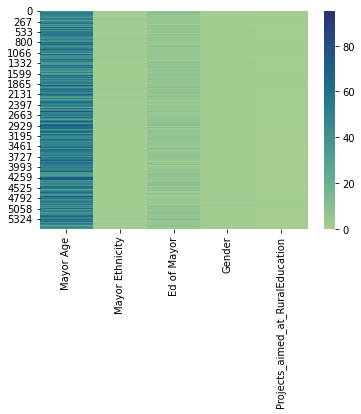

In [101]:
sns.heatmap(dfg.fillna(0),cmap="crest")

In [102]:
dffg = cdd1.iloc[:,1::]

In [103]:
dffg.head(10)

,Mayor Ethnicity,Ed of Mayor,Gender,Projects_aimed_at_RuralEducation
0,1,9,1,1
1,1,6,2,1
2,2,6,1,1
3,2,6,1,1
4,1,6,2,None
5,2,6,1,1
6,1,6,1,None
7,2,4,1,1
8,2,9,1,0
9,1,6,2,None


In [104]:
dffg["Gender"].value_counts()

1    4893
2     673
Name: Gender, dtype: int64

<Axes: xlabel='Ed of Mayor', ylabel='Count'>

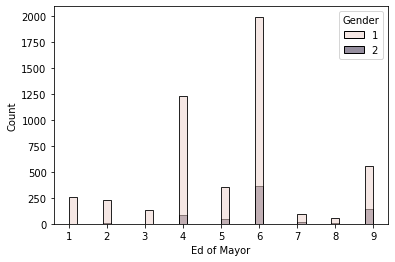

In [105]:
sns.histplot(data = cdd1,x= "Ed of Mayor",hue = "Gender")

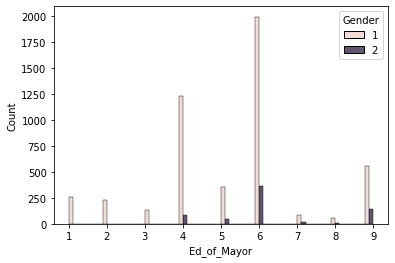

In [346]:
sns.histplot(data=cdd1, x="Ed_of_Mayor", hue="Gender", multiple="dodge")
plt.xticks(ticks = [1,2,3,4,5,6,7,8,9],label = ["Elementary education (1st grade) incomplete",
                                                "Complete Elementary School (1st Degree)","Incomplete high school (2nd degree)",
                                                "High school (2nd degree) complete","incomplete higher education",
                                                "complete higher education","Master's degree","Doctorate degree","Specialization"]);


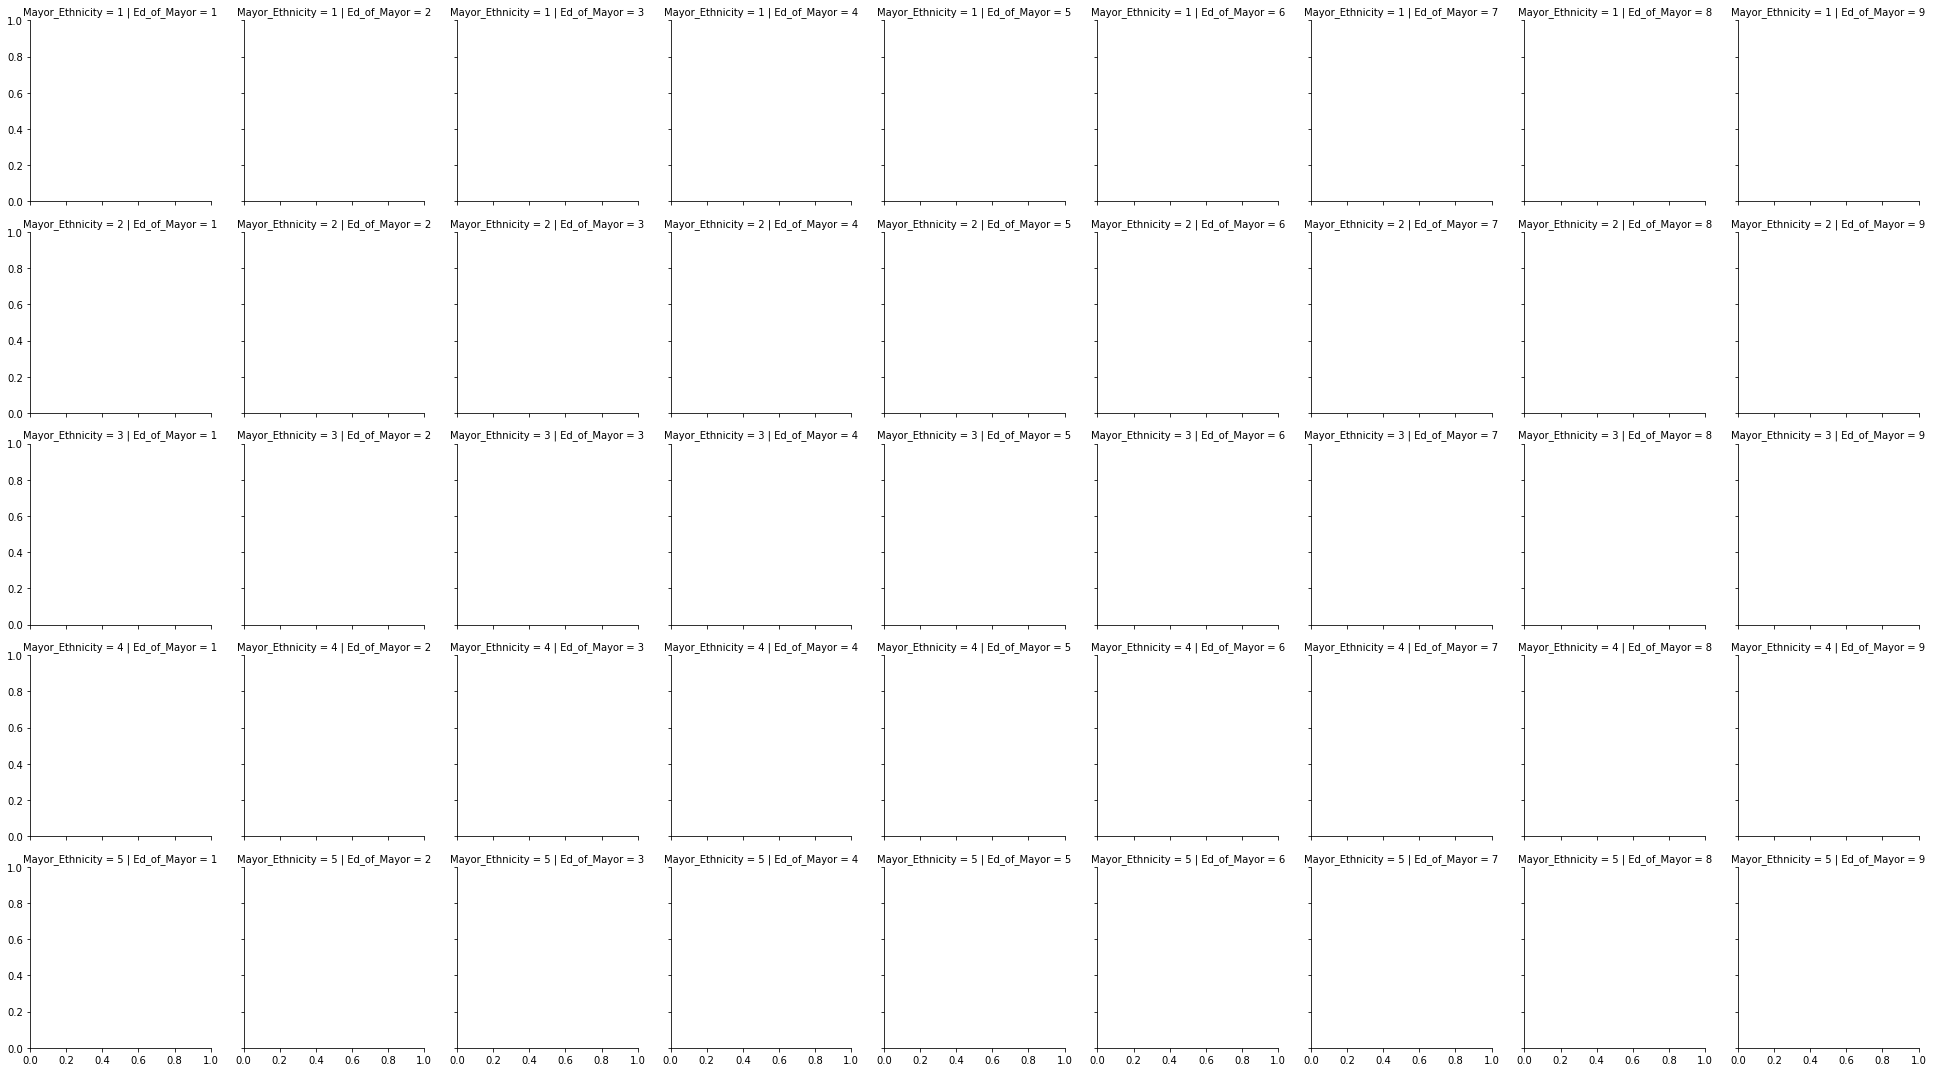

In [347]:
sds = sns.FacetGrid(cdd1,col = "Ed_of_Mayor", row = "Mayor_Ethnicity",hue ="Gender");

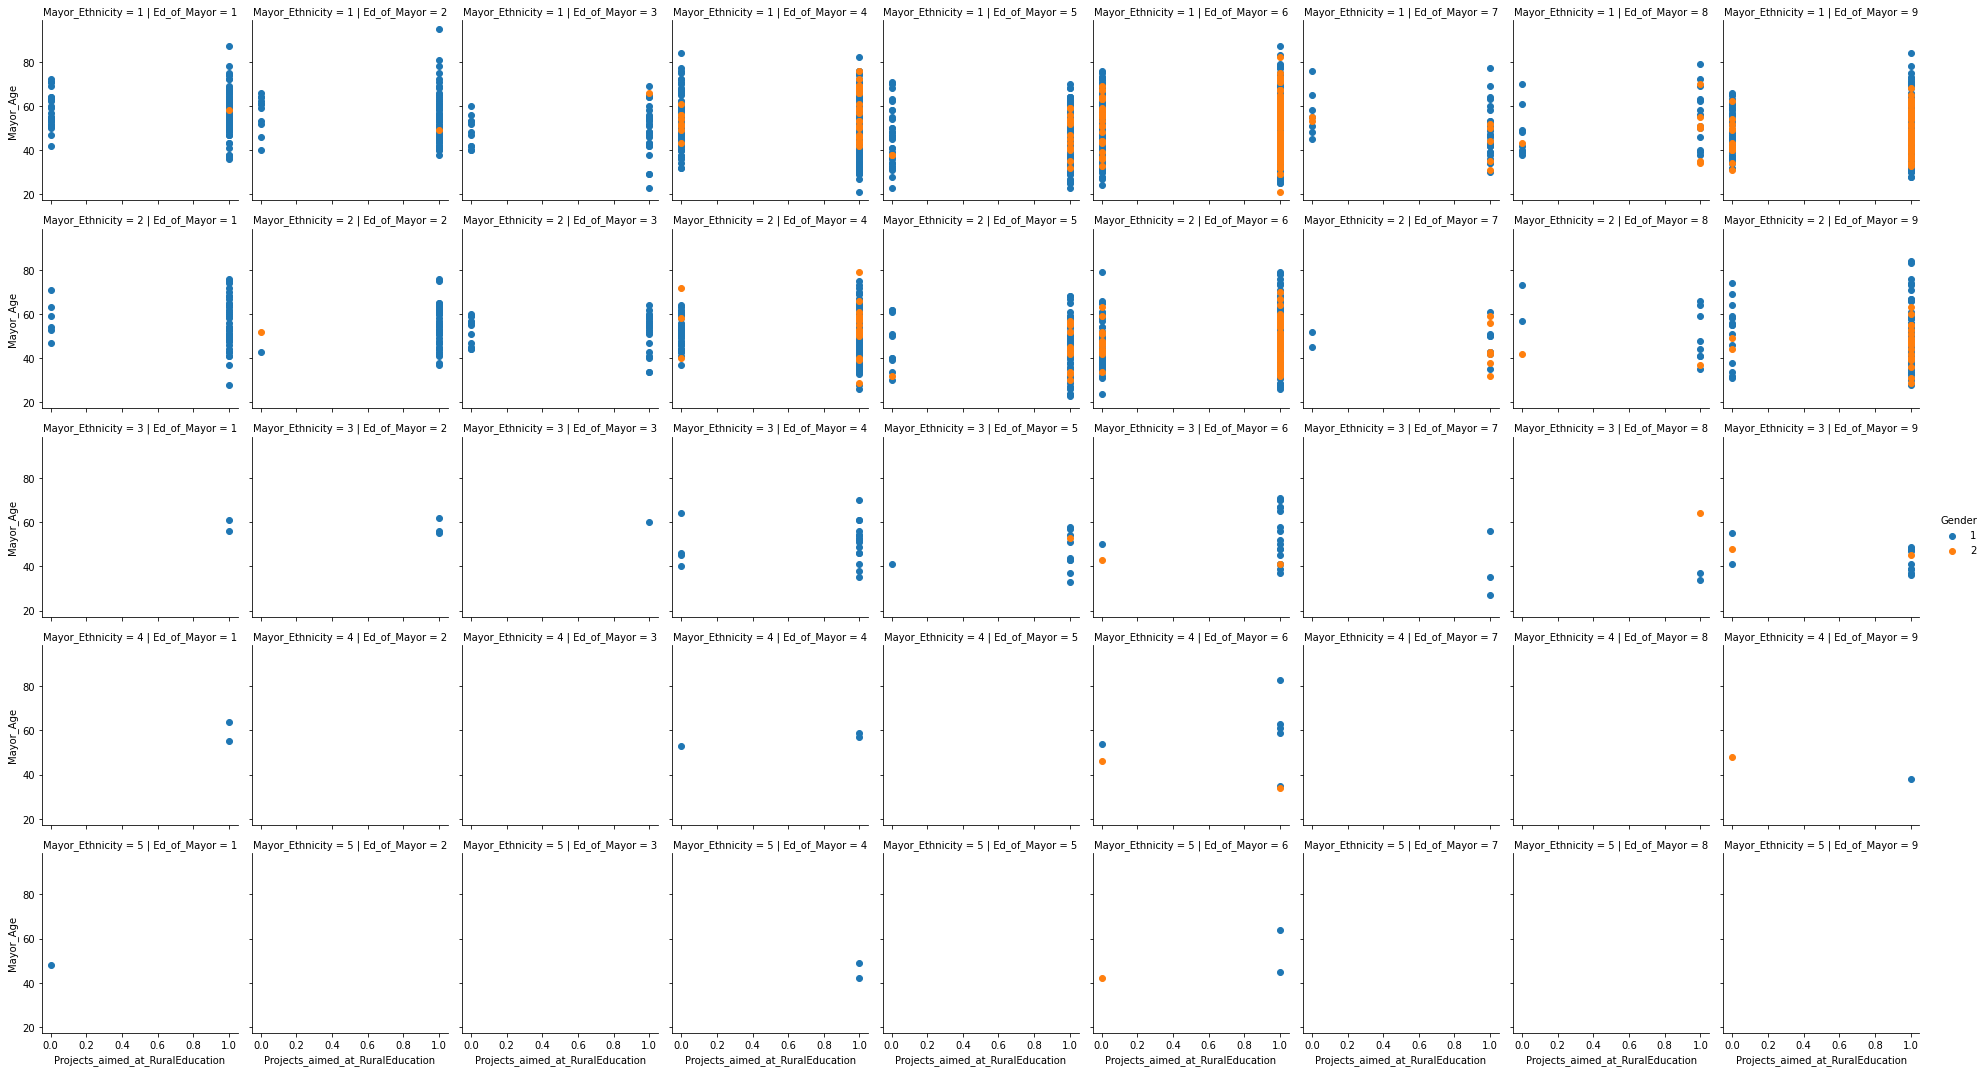

In [339]:
sdss = sds.map(plt.scatter,"Projects_aimed_at_RuralEducation","Mayor_Age" ).add_legend()

In [296]:
cdd1.head()

,Mayor_Age,Mayor_Ethnicity,Ed_of_Mayor,Gender,Projects_aimed_at_RuralEducation
0,40.0,1,9,1,1
1,33.0,1,6,2,1
2,50.0,2,6,1,1
3,35.0,2,6,1,1
4,57.0,1,6,2,None


In [246]:
cdd1[["Projects_aimed_at_RuralEducation","Gender"]]== 1;

In [245]:
cdd1[["Projects_aimed_at_RuralEducation","Gender"]][cdd1[["Projects_aimed_at_RuralEducation","Gender"]]== 1];

In [216]:
aaa = cdd1[["Projects_aimed_at_RuralEducation","Gender"]]== 1

In [193]:
aaa

,Mayor Ethnicity,Gender
0,True,True
1,True,False
2,False,True
3,False,True
4,True,False
...,...,...
5565,True,True
5566,True,True
5567,True,True
5568,False,True


In [317]:
cdd1.corr(cdd1['Mayor_Age'],cdd1['Mayor_Ethnicity'])

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [314]:
import scipy.stats as stats
from scipy.stats import spearmanr
from scipy.stats import pearsonr
from scipy.stats import kendalltau

In [307]:
 spearmanr(cdd1['Mayor_Age'], cdd1['Mayor_Ethnicity'])

SignificanceResult(statistic=nan, pvalue=nan)

In [310]:
pearsonr(cdd1['Mayor_Age'], cdd1['Mayor_Ethnicity'])

ValueError: array must not contain infs or NaNs

In [315]:
kendalltau(cdd1['Mayor_Age'], cdd1['Mayor_Ethnicity'])

SignificanceResult(statistic=nan, pvalue=nan)

In [ ]:
if 

In [286]:
cdd1.query( "Mayor_Ethnicity == 1 and Ed_of_Mayor == 9 and Gender == 1")["Projects_aimed_at_RuralEducation"].value_counts()

1    181
0     51
Name: Projects_aimed_at_RuralEducation, dtype: int64

In [ ]:
cdd1.query( "Mayor_Ethnicity == 1 and Ed_of_Mayor == 9 and Gender == 1")["Projects_aimed_at_RuralEducation"].value_counts()

In [226]:
cdd1.columns = ['Mayor_Age', 'Mayor_Ethnicity', 'Ed_of_Mayor', 'Gender',
       'Projects_aimed_at_RuralEducation']

total male mayors are 4893 and female mayors are 673, 46 percent of male mayors amd 49 percent of female mayors are aimed projects at rural population.we can observe that mayors with ethnicity "white"(with code 1) are 68 percent. mayors ethnicity whites and browns who Education
                                                 High school (2nd degree) complete, 
                                                 High school (2nd degree) complete,
                                                 incomplete higher education ,
                                                 complete higher education, 
                                                 Master's degree 
these categories are significant education level 

mayors who completed "higher education" are 42 percent of total mayors ; male are 85 % female are 15%   
54 percent of total female mayors and 41 percent of total male mayors are completed higher education

In [284]:
cdd1["Mayor_Ethnicity"].value_counts()
# "White" = 1,"brown" = 2,"black" = 3,"Yellow" = 4,"Indigenous" = 5

1    3828
2    1577
3     128
4      24
5       9
Name: Mayor_Ethnicity, dtype: int64

In [327]:
len(cdd1)

5566

In [272]:
len(cdd1.query("Gender == 1"))

4893

In [277]:
len(cdd1.query("Gender == 2"))

673

In [276]:
len(cdd1.query(" Gender == 1 & Projects_aimed_at_RuralEducation == 1 "))

2261

In [275]:
len(cdd1.query(" Gender == 2 & Projects_aimed_at_RuralEducation == 1 "))

333

In [293]:
len(cdd1.query("Mayor_Ethnicity == 1 and Ed_of_Mayor == 4 and Projects_aimed_at_RuralEducation == 1" ))

324

In [319]:
len(cdd1.query("Mayor_Ethnicity == 1 and Ed_of_Mayor == 5 and Projects_aimed_at_RuralEducation == 1" ))

125

In [318]:
len(cdd1.query("Mayor_Ethnicity == 1 and Ed_of_Mayor == 6 and Projects_aimed_at_RuralEducation == 1" ))

738

In [320]:
len(cdd1.query("Mayor_Ethnicity == 1 and Ed_of_Mayor == 9 and Projects_aimed_at_RuralEducation == 1" ))

235

In [321]:
len(cdd1.query("Mayor_Ethnicity == 2 and Ed_of_Mayor == 4 and Projects_aimed_at_RuralEducation == 1" ))

237

In [325]:
len(cdd1.query("Mayor_Ethnicity == 2 and Ed_of_Mayor == 5 and Projects_aimed_at_RuralEducation == 1" ))

85

In [324]:
len(cdd1.query("Mayor_Ethnicity == 2 and Ed_of_Mayor == 6 and Projects_aimed_at_RuralEducation == 1" ))

309

In [322]:
len(cdd1.query("Mayor_Ethnicity == 2 and Ed_of_Mayor == 9 and Projects_aimed_at_RuralEducation == 1" ))

101

In [326]:
len(cdd1.query("Ed_of_Mayor == 6" ))

2356

In [328]:
len(cdd1.query("Ed_of_Mayor == 6 & Gender == 1" ))

1991

In [329]:
len(cdd1.query("Ed_of_Mayor == 6 & Gender == 2" ))

365

In [294]:
len(cdd1.query("Mayor_Ethnicity == 1 and Ed_of_Mayor == 4 and Projects_aimed_at_RuralEducation == 0" ))

#"Elementary education (1st grade) incomplete","Complete Elementary School (1st Degree)",
# "Incomplete high school (2nd degree)","High school (2nd degree) complete",
# "incomplete higher education","complete higher education","Master's degree",
# "Doctorate degree","Specialization","Refusal"

99

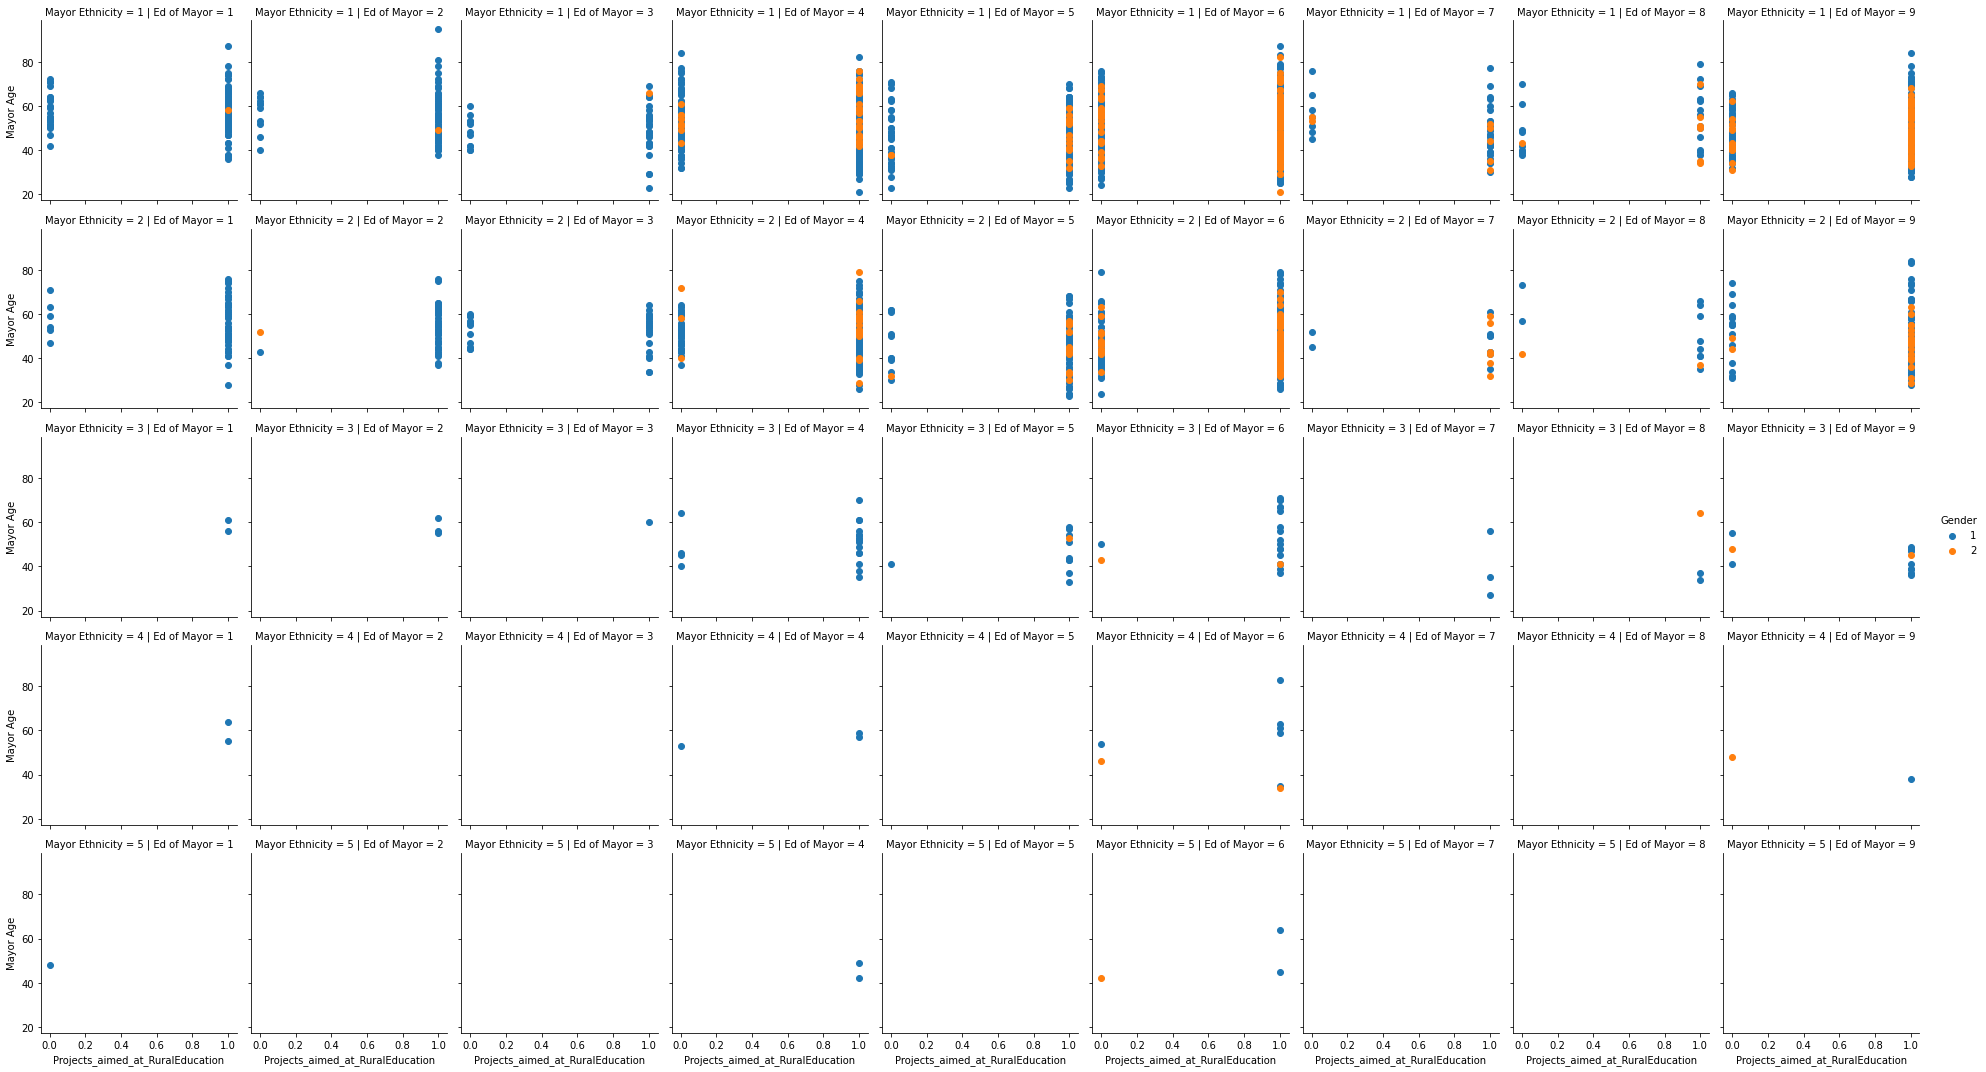

In [178]:
sgf = sns.FacetGrid(cdd1,col = "Ed of Mayor", row = "Mayor Ethnicity",hue ="Gender")
sgff = sgf.map(plt.scatter,"Projects_aimed_at_RuralEducation","Mayor Age" ).add_legend()

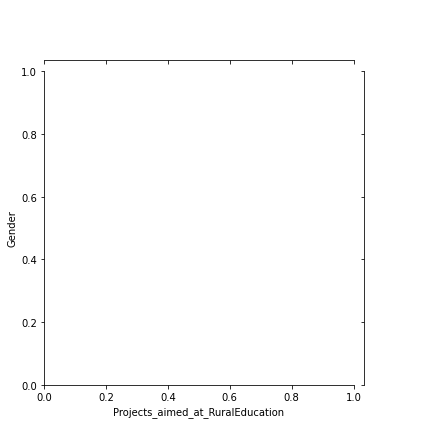

In [167]:
var = sns.JointGrid(x ="Projects_aimed_at_RuralEducation", y = "Gender",data = cdd1 )

/Users/charanteja/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:1880: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(self.x, **orient_kw_x, **kwargs)
/Users/charanteja/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:1886: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(self.y, **orien

UFuncTypeError: Cannot cast ufunc 'svd_n_s' input from dtype('O') to dtype('float64') with casting rule 'same_kind'

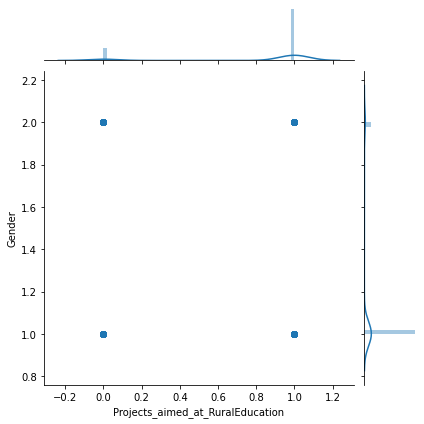

In [251]:
var1 = var.plot(sns.regplot,sns.distplot);

In [ ]:
cdd1

<Axes: >

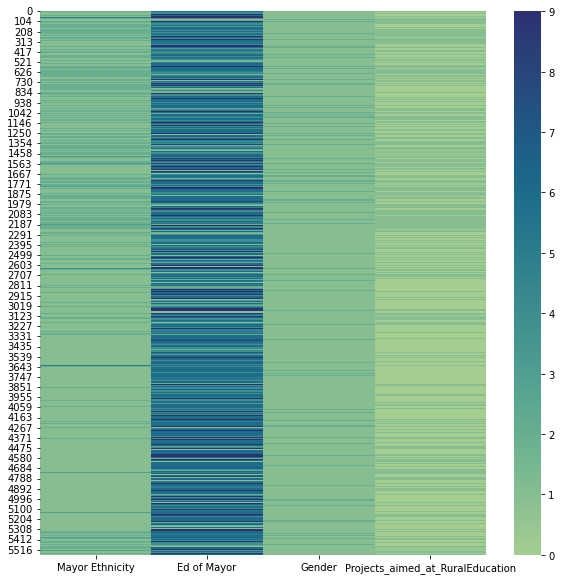

In [112]:
plt.figure(figsize = (10,10))
sns.heatmap(dffg.fillna(0),cmap = "crest")

<Axes: xlabel='Ed of Mayor', ylabel='Mayor Age'>

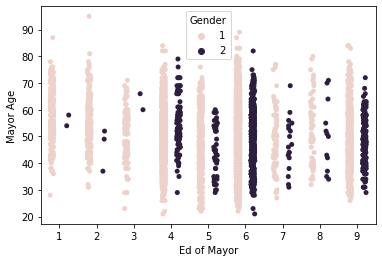

In [113]:
sns.stripplot(data = cdd1, y = "Mayor Age",x = 'Ed of Mayor',jitter=True,hue = "Gender",dodge = True)

/Users/charanteja/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:3544: UserWarning: 90.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/charanteja/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:3544: UserWarning: 48.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/charanteja/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:3544: UserWarning: 79.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/charanteja/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:3544: UserWarning: 10.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='Mayor Ethnicity', ylabel='Mayor Age'>

/Users/charanteja/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:3544: UserWarning: 12.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


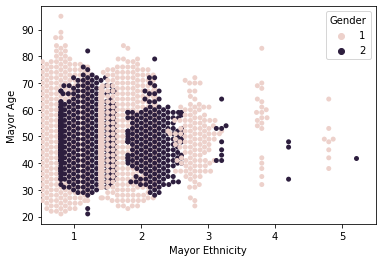

In [114]:
sns.swarmplot(data = cdd1, y = "Mayor Age",x = 'Mayor Ethnicity',hue = "Gender",dodge = True)

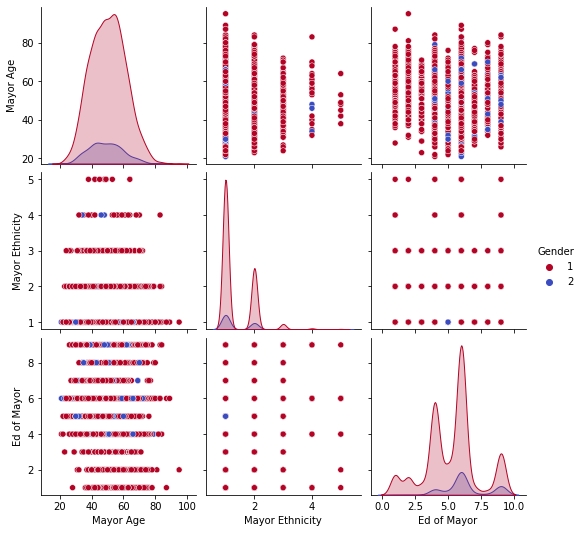

In [116]:
sns.pairplot(data = cdd1, hue = "Gender", palette="coolwarm_r")

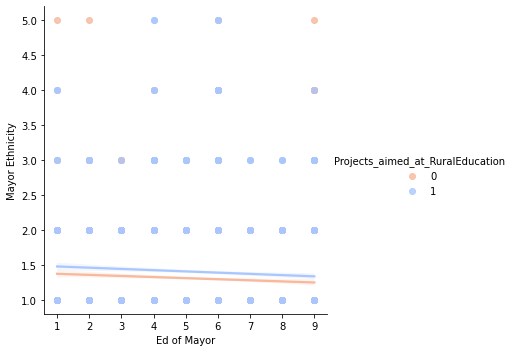

In [115]:
sns.lmplot(data = cdd1.fillna(0),x = "Ed of Mayor",y="Mayor Ethnicity", hue = "Projects_aimed_at_RuralEducation", palette="coolwarm_r")

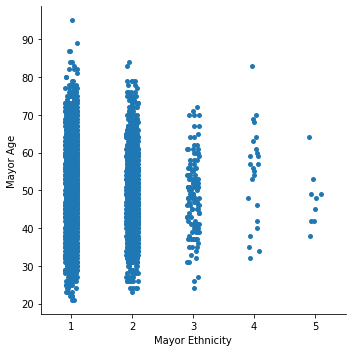

In [117]:
sns.catplot(data = cdd1, y = "Mayor Age",x = 'Mayor Ethnicity')

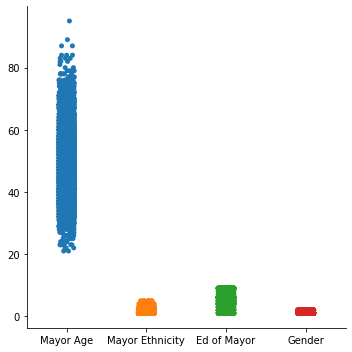

In [118]:
sns.catplot(data = cdd1)

In [119]:
nd1 = data0.iloc[:,8::]

In [120]:
nd1.head()

,Mayor Ethnicity,Ed of Mayor,Gender,Projects_aimed_at_RuralEducation
0,1,9,1,1
1,1,6,2,1
2,2,6,1,1
3,2,6,1,1
4,1,6,2,None


<Figure size 720x1440 with 0 Axes>

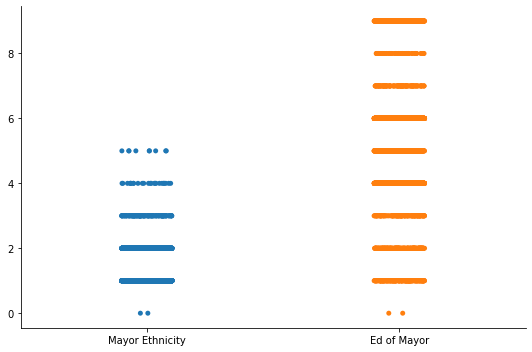

In [121]:
plt.figure(figsize=(10,20))
sns.catplot(data = nd1,height=5,aspect=1.5)

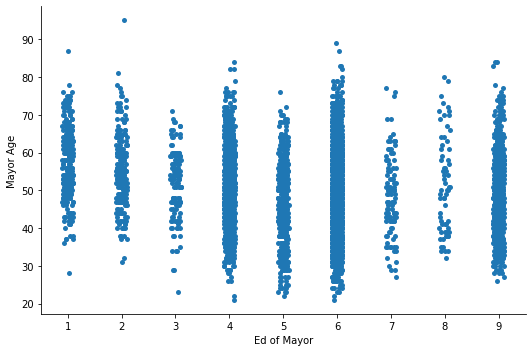

In [122]:
sns.catplot(data = cdd1,y = "Mayor Age", x = "Ed of Mayor",height=5,aspect=1.5)

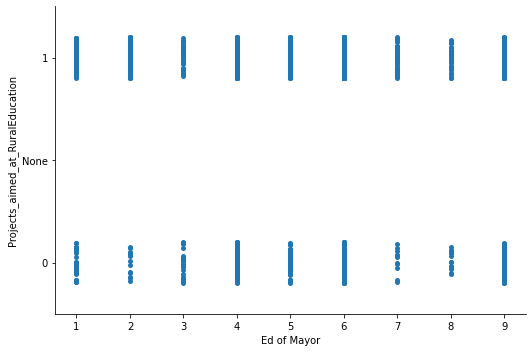

In [123]:
sns.catplot(data = cdd1,y = "Projects_aimed_at_RuralEducation", x = "Ed of Mayor",height=5,aspect=1.5)

In [124]:
data0.dtypes

CodMun                                int64
State                                object
State code                            int64
Municipaly                           object
Estimated pop 2021                    int64
track_pop                             int64
Region                                int64
Mayor Age                           float64
Mayor Ethnicity                       int64
Ed of Mayor                           int64
Gender                               object
Projects_aimed_at_RuralEducation     object
dtype: object

In [125]:
df_cat = pd.DataFrame(data = data0.dtypes, columns = 
                      ['a']).reset_index()
cat_var = list(df_cat['index'].loc[df_cat['a'] == 'object'])
cat_var

df_cat = data0[cat_var]
df_cat.head()

,State,Municipaly,Gender,Projects_aimed_at_RuralEducation
0,RO,Alta Floresta DOeste,1,1
1,RO,Ariquemes,2,1
2,RO,Cabixi,1,1
3,RO,Cacoal,1,1
4,RO,Cerejeiras,2,None


In [126]:
cat_var

['State', 'Municipaly', 'Gender', 'Projects_aimed_at_RuralEducation']

In [127]:
df_cat_v1 = df_cat.dropna()
df_cat_v1.shape

(3232, 4)

In [128]:
df_cat_v1

,State,Municipaly,Gender,Projects_aimed_at_RuralEducation
0,RO,Alta Floresta DOeste,1,1
1,RO,Ariquemes,2,1
2,RO,Cabixi,1,1
3,RO,Cacoal,1,1
5,RO,Colorado do Oeste,1,1
...,...,...,...,...
5560,GO,Uruaçu,1,1
5563,GO,Valparaíso de Goiás,1,0
5564,GO,Varjão,1,1
5565,GO,Vianópolis,1,1


In [129]:
cat_var1 = ('Gender', 'Projects_aimed_at_RuralEducation')
cat_var2 = ('Gender', 'Projects_aimed_at_RuralEducation')

In [130]:
## Let us jump to Chi-Square test
## Creating all possible combinations between the above two variables list
cat_var_prod = list(product(cat_var1,cat_var2, repeat = 1))

In [131]:
cat_var_prod

[('Gender', 'Gender'),
 ('Gender', 'Projects_aimed_at_RuralEducation'),
 ('Projects_aimed_at_RuralEducation', 'Gender'),
 ('Projects_aimed_at_RuralEducation', 'Projects_aimed_at_RuralEducation')]

In [132]:
result = []
for i in cat_var_prod:
    if i[0] != i[1]:
        result.append(
            (i[0],i[1],list(ss.chi2_contingency(pd.crosstab(df_cat_v1[i[0]], df_cat_v1[i[1]])))[1]))
result

[('Gender', 'Projects_aimed_at_RuralEducation', 0.0),
 ('Projects_aimed_at_RuralEducation', 'Gender', 0.0)]

In [133]:
chi_test_output = pd.DataFrame(result, columns = ['var1', 'var2', 
                                                       'coeff'])

In [134]:
chi_test_output.pivot(index = 'var1', columns='var2', values='coeff')

var2,Gender,Projects_aimed_at_RuralEducation
var1,,
Gender,NaN,0.0
Projects_aimed_at_RuralEducation,0.0,NaN


In [135]:
fggg = pd.read_excel("Book3.xlsx")

In [136]:
df_cat = pd.DataFrame(data = data0.dtypes, columns = 
                      ['a']).reset_index()



In [137]:
df_cat 

,index,a
0,CodMun,int64
1,State,object
2,State code,int64
3,Municipaly,object
4,Estimated pop 2021,int64
5,track_pop,int64
6,Region,int64
7,Mayor Age,float64
8,Mayor Ethnicity,int64
9,Ed of Mayor,int64


In [138]:
fggg.head()

,CodMun,State,State code,Municipaly,Estimated pop 2021,track_pop,Region,mpeg03,Mayor Age,Mayor Ethnicity,mpeg06 - Education of the mayor,Education of mayor,Projects aimed at Rural Population
0,1100015,RO,11,Alta Floresta DOeste,22516,4 - 20001 to 50000,1 - North,Masculine,40.0,White,Specialization,NaN,Yes
1,1100023,RO,11,Ariquemes,111148,6 - 100001 to 500000,1 - North,Female,33.0,White,complete higher education,2.0,Yes
2,1100031,RO,11,Cabixi,5067,2 - 5001 to 10000,1 - North,Masculine,50.0,brown,complete higher education,2.0,Yes
3,1100049,RO,11,Cacoal,86416,5 - 50001 to 100000,1 - North,Masculine,35.0,brown,complete higher education,2.0,Yes
4,1100056,RO,11,Cerejeiras,16088,3 - 10001 to 20000,1 - North,Female,57.0,White,complete higher education,2.0,-


In [139]:
data0.iloc[:,1::]

,State,State code,Municipaly,Estimated pop 2021,track_pop,Region,Mayor Age,Mayor Ethnicity,Ed of Mayor,Gender,Projects_aimed_at_RuralEducation
0,RO,11,Alta Floresta DOeste,22516,4,1,40.0,1,9,1,1
1,RO,11,Ariquemes,111148,6,1,33.0,1,6,2,1
2,RO,11,Cabixi,5067,2,1,50.0,2,6,1,1
3,RO,11,Cacoal,86416,5,1,35.0,2,6,1,1
4,RO,11,Cerejeiras,16088,3,1,57.0,1,6,2,None
...,...,...,...,...,...,...,...,...,...,...,...
5565,GO,52,Vianópolis,14088,3,5,38.0,1,6,1,1
5566,GO,52,Vicentinópolis,9002,2,5,55.0,1,4,1,None
5567,GO,52,Vila Boa,6451,2,5,49.0,1,6,1,None
5568,GO,52,Vila Propício,5941,2,5,49.0,2,6,1,None


In [140]:
df_cat_v = data0.iloc[:,1::].dropna()
df_cat_v.shape

(3220, 11)

In [141]:
df_cat_v1 = df_cat_v[df_cat_v.Projects_aimed_at_RuralEducation != "Did not inform"]

In [142]:
df_cat_v1 = df_cat_v1[df_cat_v1.Projects_aimed_at_RuralEducation != "Refusal"]

In [143]:
#df_cat_v1 = df_cat_v[df_cat_v.Projects_aimed_at_RuralEducation != "Did not inform"]

In [144]:
f = df_cat_v1.iloc[:,10]

In [145]:
f.value_counts()

1    2586
0     632
Name: Projects_aimed_at_RuralEducation, dtype: int64

In [146]:
df_cat_v1.head()

,State,State code,Municipaly,Estimated pop 2021,track_pop,Region,Mayor Age,Mayor Ethnicity,Ed of Mayor,Gender,Projects_aimed_at_RuralEducation
0,RO,11,Alta Floresta DOeste,22516,4,1,40.0,1,9,1,1
1,RO,11,Ariquemes,111148,6,1,33.0,1,6,2,1
2,RO,11,Cabixi,5067,2,1,50.0,2,6,1,1
3,RO,11,Cacoal,86416,5,1,35.0,2,6,1,1
5,RO,11,Colorado do Oeste,15213,3,1,56.0,2,6,1,1


In [147]:
df_cat_v1.shape

(3218, 11)

In [148]:
df_cat_w1 = df_cat_v1.dropna()
df_cat_w1.shape

(3218, 11)

In [149]:
df_cat_w1.columns

Index(['State', 'State code', 'Municipaly', 'Estimated pop 2021', 'track_pop',
       'Region', 'Mayor Age', 'Mayor Ethnicity', 'Ed of Mayor', 'Gender',
       'Projects_aimed_at_RuralEducation'],
      dtype='object')

In [150]:
cat_var_1 = ( 'State', 'State code', 'Municipaly', 'Estimated pop 2021',
       'track_pop', 'Region', 'Mayor Age', 'Mayor Ethnicity', 'Ed of Mayor',
       'Gender', 'Projects_aimed_at_RuralEducation')

In [151]:
cat_var_2 = ( 'State', 'State code', 'Municipaly', 'Estimated pop 2021',
       'track_pop', 'Region', 'Mayor Age', 'Mayor Ethnicity', 'Ed of Mayor',
       'Gender', 'Projects_aimed_at_RuralEducation')

In [152]:
## Let us jump to Chi-Square test
## Creating all possible combinations between the above two variables list
cat_var_prod_1 = list(product(cat_var_1,cat_var_2, repeat = 1))

In [153]:
cat_var_prod_1;

In [154]:
result = []
for i in cat_var_prod_1:
    if i[0] != i[1]:
        result.append((i[0],i[1],list(ss.chi2_contingency(pd.crosstab(
                            df_cat_w1[i[0]], df_cat_w1[i[1]])))[1]))
result

[('State', 'State code', 0.0),
 ('State', 'Municipaly', 0.717305139150204),
 ('State', 'Estimated pop 2021', 0.11811672618973652),
 ('State', 'track_pop', 1.1627645343847598e-137),
 ('State', 'Region', 0.0),
 ('State', 'Mayor Age', 0.6623918889114617),
 ('State', 'Mayor Ethnicity', 3.862701754609543e-94),
 ('State', 'Ed of Mayor', 8.533076103213807e-07),
 ('State', 'Gender', 4.103624342770302e-07),
 ('State', 'Projects_aimed_at_RuralEducation', 3.23428957817529e-28),
 ('State code', 'State', 0.0),
 ('State code', 'Municipaly', 0.7173051391501918),
 ('State code', 'Estimated pop 2021', 0.11811672618972223),
 ('State code', 'track_pop', 1.1627645343847598e-137),
 ('State code', 'Region', 0.0),
 ('State code', 'Mayor Age', 0.6623918889114617),
 ('State code', 'Mayor Ethnicity', 3.862701754609764e-94),
 ('State code', 'Ed of Mayor', 8.533076103213807e-07),
 ('State code', 'Gender', 4.103624342770333e-07),
 ('State code', 'Projects_aimed_at_RuralEducation', 3.234289578175242e-28),
 ('Munici

In [155]:
chi_test_output = pd.DataFrame(result, columns = ['var1','var2','coeff'])

chi_test_output.pivot(index = 'var1', columns='var2', values='coeff')

var2,Ed of Mayor,Estimated pop 2021,Gender,Mayor Age,Mayor Ethnicity,Municipaly,Projects_aimed_at_RuralEducation,Region,State,State code,track_pop
var1,,,,,,,,,,,
Ed of Mayor,NaN,0.391921,3.099469e-18,2.140585e-15,8.765776e-04,0.461027,4.175257e-02,1.559509e-02,8.533076e-07,8.533076e-07,2.049085e-19
Estimated pop 2021,3.919207e-01,NaN,4.344304e-01,5.070754e-02,8.907689e-01,0.547859,5.773130e-01,4.799833e-01,1.181167e-01,1.181167e-01,1.863713e-05
Gender,3.099469e-18,0.434430,NaN,8.398282e-01,6.563171e-01,0.612894,6.102934e-01,4.545456e-09,4.103624e-07,4.103624e-07,1.195155e-01
Mayor Age,2.140585e-15,0.050708,8.398282e-01,NaN,2.137595e-01,0.995787,9.192237e-01,8.950360e-01,6.623919e-01,6.623919e-01,2.979382e-01
Mayor Ethnicity,8.765776e-04,0.890769,6.563171e-01,2.137595e-01,NaN,0.705322,8.963362e-04,8.528493e-114,3.862702e-94,3.862702e-94,5.478943e-04
Municipaly,4.610274e-01,0.547859,6.128944e-01,9.957874e-01,7.053225e-01,NaN,3.465757e-01,2.765897e-01,7.173051e-01,7.173051e-01,4.894836e-01
Projects_aimed_at_RuralEducation,4.175257e-02,0.577313,6.102934e-01,9.192237e-01,8.963362e-04,0.346576,NaN,1.802724e-24,3.234290e-28,3.234290e-28,7.259346e-14
Region,1.559509e-02,0.479983,4.545456e-09,8.950360e-01,8.528493e-114,0.276590,1.802724e-24,NaN,0.000000e+00,0.000000e+00,3.891713e-50
State,8.533076e-07,0.118117,4.103624e-07,6.623919e-01,3.862702e-94,0.717305,3.234290e-28,0.000000e+00,NaN,0.000000e+00,1.162765e-137


In [156]:
data0;

In [157]:
columnnames = data0.columns

In [158]:
from scipy.stats import f_oneway

In [159]:
columnnames

Index(['CodMun', 'State', 'State code', 'Municipaly', 'Estimated pop 2021',
       'track_pop', 'Region', 'Mayor Age', 'Mayor Ethnicity', 'Ed of Mayor',
       'Gender', 'Projects_aimed_at_RuralEducation'],
      dtype='object')

In [160]:
categorygrouplists = df_cat_w1.groupby("Ed of Mayor")['Mayor Age'].apply(list)
#, 'Estimated pop 2021','track_pop', 'Region', 'Mayor Age', 'Mayor Ethnicity','Gender', 'Projects_aimed_at_RuralEducation'

In [161]:
categorygrouplists

Ed of Mayor
1    [66.0, 65.0, 58.0, 54.0, 48.0, 63.0, 54.0, 62....
2    [65.0, 49.0, 49.0, 55.0, 44.0, 52.0, 51.0, 41....
3    [53.0, 52.0, 56.0, 52.0, 43.0, 44.0, 34.0, 45....
4    [41.0, 51.0, 56.0, 47.0, 53.0, 55.0, 52.0, 37....
5    [29.0, 52.0, 55.0, 42.0, 42.0, 52.0, 26.0, 47....
6    [33.0, 50.0, 35.0, 56.0, 51.0, 53.0, 48.0, 46....
7    [51.0, 52.0, 27.0, 59.0, 43.0, 50.0, 60.0, 42....
8    [44.0, 64.0, 73.0, 51.0, 37.0, 48.0, 37.0, 79....
9    [40.0, 55.0, 37.0, 38.0, 53.0, 48.0, 56.0, 58....
Name: Mayor Age, dtype: object

In [162]:
f_oneway(*categorygrouplists)

F_onewayResult(statistic=22.33983350937245, pvalue=1.7981151355084082e-33)

In [163]:
data0.dtypes

CodMun                                int64
State                                object
State code                            int64
Municipaly                           object
Estimated pop 2021                    int64
track_pop                             int64
Region                                int64
Mayor Age                           float64
Mayor Ethnicity                       int64
Ed of Mayor                           int64
Gender                               object
Projects_aimed_at_RuralEducation     object
dtype: object

In [164]:
from scipy.stats import pearsonr

In [165]:
pearsonr(dr,dr)

NameError: name 'dr' is not defined

In [ ]:
dr = df_cat_w1.iloc[:,3::]

In [ ]:
gh = dr.corr()

In [ ]:
sns.heatmap(gh,cmap="crest",annot=True)

In [ ]:
df_cat_w1.corr()

In [ ]:
def gtype(x):
    x = range(0,4)
    print(type(cdd1.iloc[1,x]))

In [ ]:
gtype(2)